<a href="https://colab.research.google.com/github/leehg9805/S-W-/blob/main/22_08_24_%EB%8C%80%EC%B6%9C_%EB%94%A5%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 불러오기

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
os.environ['KAGGLE_USERNAME'] = 'morbaenoma'
os.environ['KAGGLE_KEY'] = "fcf85e125cea448d18703f912fa7a8a2"

In [3]:
!kaggle datasets download -d teertha/personal-loan-modeling

personal-loan-modeling.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
!unzip '*.zip'

Archive:  personal-loan-modeling.zip
replace Bank_Personal_Loan_Modelling.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Bank_Personal_Loan_Modelling.csv  


In [5]:
# 데이터 확인
df = pd.read_csv('/content/Bank_Personal_Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
# 데이터 확인을 통해 NaN값이 없다는 것을 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
# 데이터의 전체적인 수치 정보 확인
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [8]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [9]:
# 딥러닝시 필요없는 컬럼 제거
df.drop(['ID','ZIP Code','Securities Account'], axis=1, inplace= True)

In [10]:
df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [11]:
# 범주형 데이터인 가족단위의 개수 확인
df['Family'].value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [12]:
# 범주형 데이터인 교육수준 단위의 개수 확인
df['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

# EDA

<function matplotlib.pyplot.show(*args, **kw)>

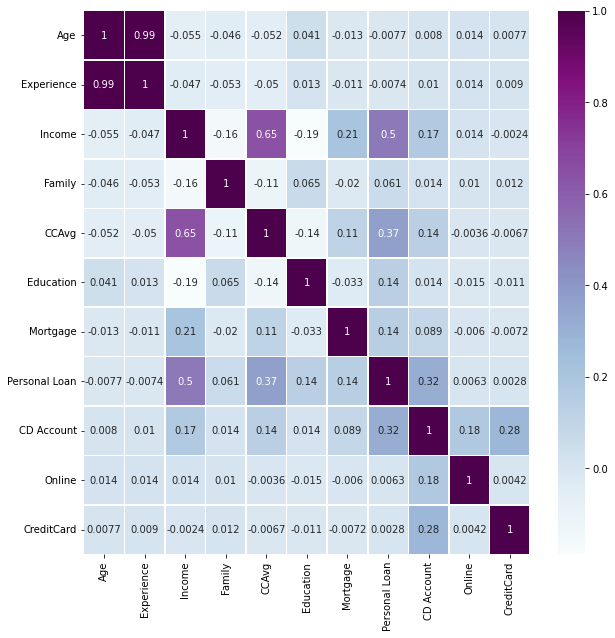

In [13]:
# 히트맵을 이용해 상관계수 확인
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(df.corr(),cmap='BuPu',cbar=True,annot=True,linewidths=0.5,ax=ax)
plt.show

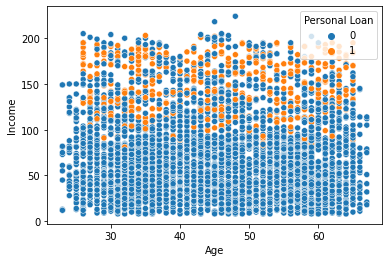

In [14]:
# 산점도를 통해 수익이 높은 사람일 수록 대출 허락을 많이 함
sns.scatterplot(x = 'Age', y = 'Income', data = df, hue = 'Personal Loan')

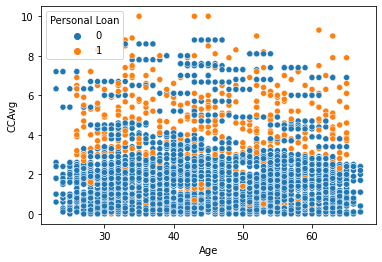

In [15]:
sns.scatterplot(x = 'Age', y = 'CCAvg', data = df, hue = 'Personal Loan')

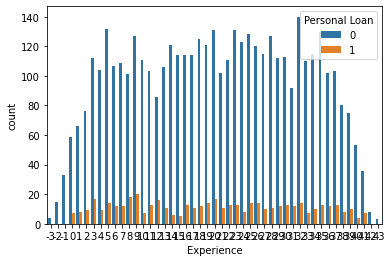

In [16]:
sns.countplot(x='Experience', hue = 'Personal Loan', data = df)

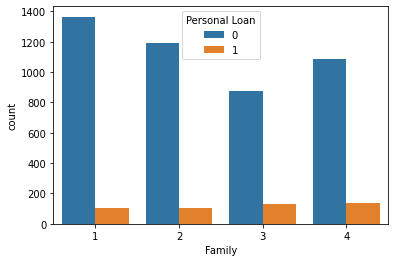

In [17]:
sns.countplot(x='Family', hue = 'Personal Loan', data = df)

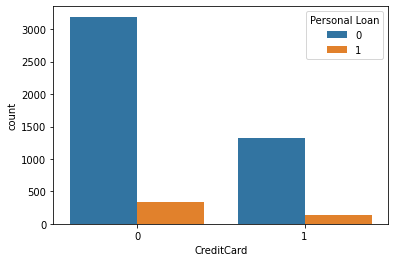

In [18]:
sns.countplot(x='CreditCard', hue = 'Personal Loan', data = df)

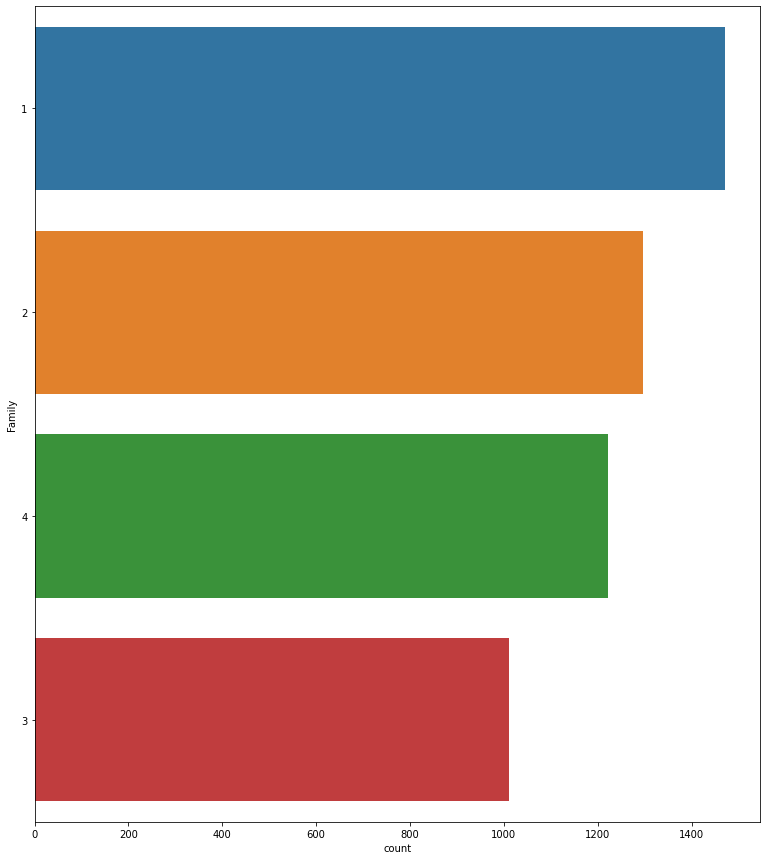

In [19]:
from numpy import ma
fig = plt.figure(figsize=(13,15))
sns.countplot(y='Family', data=df.fillna('n/a'),
              order =df.fillna('n/a')['Family'].value_counts().index)

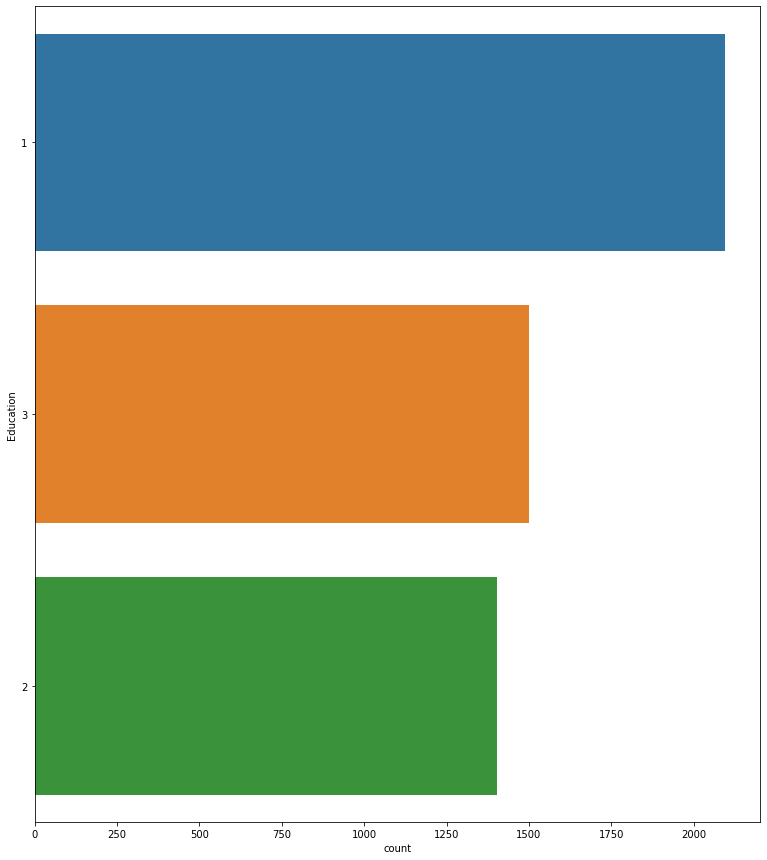

In [20]:
from numpy import ma
fig = plt.figure(figsize=(13,15))
sns.countplot(y='Education', data=df.fillna('n/a'),
              order =df.fillna('n/a')['Education'].value_counts().index)

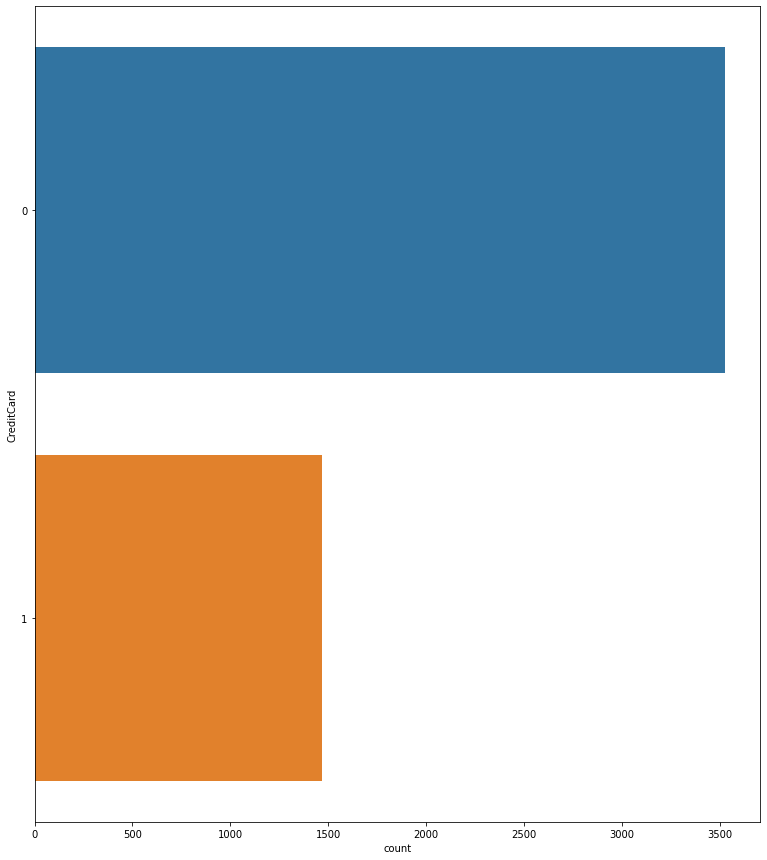

In [21]:
from numpy import ma
fig = plt.figure(figsize=(13,15))
sns.countplot(y='CreditCard', data=df.fillna('n/a'),
              order =df.fillna('n/a')['CreditCard'].value_counts().index)

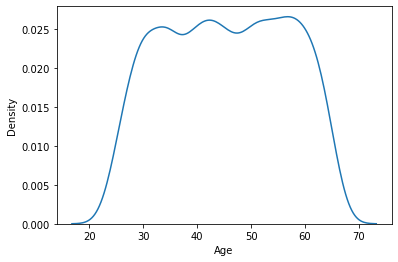

In [22]:
sns.kdeplot(x=df['Age'])

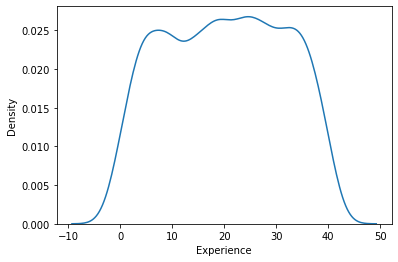

In [23]:
sns.kdeplot(x=df['Experience'])

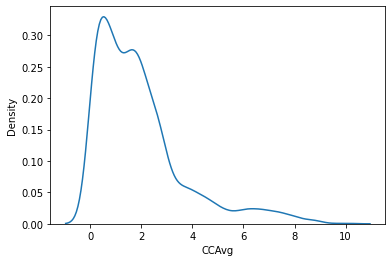

In [24]:
sns.kdeplot(x=df['CCAvg'])

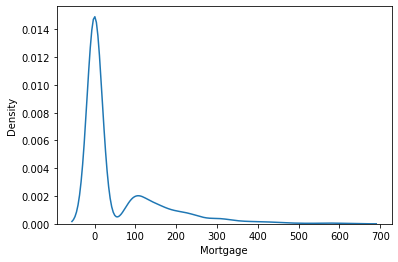

In [25]:
sns.kdeplot(x=df['Mortgage'])

In [26]:
# 범주형 데이터들을 category 타입으로 변경
category_cols = ['Family', 'CreditCard', 'Education' ]

for col in category_cols:
  df[col] = df[col].astype('category')

df.dtypes

Age                 int64
Experience          int64
Income              int64
Family           category
CCAvg             float64
Education        category
Mortgage            int64
Personal Loan       int64
CD Account          int64
Online              int64
CreditCard       category
dtype: object

In [27]:
# 범주형 데이터 원 핫 인코딩
df_onehot = pd.get_dummies(df)
df_onehot.shape

(5000, 17)

In [28]:
df_onehot.isnull().sum()

Age              0
Experience       0
Income           0
CCAvg            0
Mortgage         0
Personal Loan    0
CD Account       0
Online           0
Family_1         0
Family_2         0
Family_3         0
Family_4         0
Education_1      0
Education_2      0
Education_3      0
CreditCard_0     0
CreditCard_1     0
dtype: int64

In [29]:
X_data = df_onehot.drop(['Personal Loan'], axis=1)
X_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           5000 non-null   int64  
 1   Experience    5000 non-null   int64  
 2   Income        5000 non-null   int64  
 3   CCAvg         5000 non-null   float64
 4   Mortgage      5000 non-null   int64  
 5   CD Account    5000 non-null   int64  
 6   Online        5000 non-null   int64  
 7   Family_1      5000 non-null   uint8  
 8   Family_2      5000 non-null   uint8  
 9   Family_3      5000 non-null   uint8  
 10  Family_4      5000 non-null   uint8  
 11  Education_1   5000 non-null   uint8  
 12  Education_2   5000 non-null   uint8  
 13  Education_3   5000 non-null   uint8  
 14  CreditCard_0  5000 non-null   uint8  
 15  CreditCard_1  5000 non-null   uint8  
dtypes: float64(1), int64(6), uint8(9)
memory usage: 317.5 KB


In [30]:
y_data = df_onehot.iloc[:,5].values.reshape(-1,1)

In [31]:
print(X_data.shape)
print(y_data.shape)

(5000, 16)
(5000, 1)


# 데이터 셋을 나누기

In [32]:
from sklearn import preprocessing

min_max_scaler =preprocessing.MinMaxScaler()
X_data = min_max_scaler.fit_transform(X_data)

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
# 8:2로 나누기
x_train, x_test, y_train, y_test = train_test_split(
    X_data, y_data, test_size=0.2, random_state = 777)

In [35]:
print(f'훈련데이터 {x_train.shape}, 테스트데이터 {x_test.shape}')

훈련데이터 (4000, 16), 테스트데이터 (1000, 16)


In [36]:
print(x_train)

[[0.70454545 0.7173913  0.42592593 ... 1.         1.         0.        ]
 [0.75       0.76086957 0.76388889 ... 0.         1.         0.        ]
 [0.84090909 0.82608696 0.6712963  ... 1.         0.         1.        ]
 ...
 [0.36363636 0.34782609 0.19444444 ... 1.         1.         0.        ]
 [0.06818182 0.06521739 0.15740741 ... 1.         1.         0.        ]
 [0.81818182 0.7826087  0.47685185 ... 0.         1.         0.        ]]


In [37]:
print(x_test)

[[0.77272727 0.73913043 0.14351852 ... 0.         1.         0.        ]
 [0.65909091 0.63043478 0.39351852 ... 0.         1.         0.        ]
 [0.25       0.26086957 0.7962963  ... 1.         1.         0.        ]
 ...
 [0.11363636 0.15217391 0.34722222 ... 0.         0.         1.        ]
 [0.40909091 0.43478261 0.49074074 ... 0.         1.         0.        ]
 [0.79545455 0.80434783 0.15277778 ... 0.         1.         0.        ]]


In [38]:
# 7:3으로 데이터를 나누기
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3, random_state = 777)

In [39]:
print(f'훈련 데이터 {x_train.shape} 레이블 {y_train.shape}')
print(f'검증 데이터 {x_val.shape} 레이블 {y_val.shape}')

훈련 데이터 (2800, 16) 레이블 (2800, 1)
검증 데이터 (1200, 16) 레이블 (1200, 1)


In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(64, activation = 'relu', input_shape = (16, )))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [41]:
model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics=['acc'])

In [42]:
# 에폭스 300으로 두고 데이터 돌리기
history = model.fit(x_train, y_train,
                    epochs = 300,
                    validation_data = (x_val, y_val))

Epoch 1/300
88/88 [==============================] - 1s 5ms/step - loss: 0.4222 - acc: 0.8357 - val_loss: 0.3104 - val_acc: 0.9058
Epoch 2/300
88/88 [==============================] - 0s 3ms/step - loss: 0.2749 - acc: 0.9075 - val_loss: 0.2415 - val_acc: 0.9083
Epoch 3/300
88/88 [==============================] - 0s 3ms/step - loss: 0.1868 - acc: 0.9286 - val_loss: 0.1621 - val_acc: 0.9342
Epoch 4/300
88/88 [==============================] - 0s 3ms/step - loss: 0.1249 - acc: 0.9593 - val_loss: 0.1306 - val_acc: 0.9450
Epoch 5/300
88/88 [==============================] - 0s 3ms/step - loss: 0.0995 - acc: 0.9686 - val_loss: 0.1094 - val_acc: 0.9567
Epoch 6/300
88/88 [==============================] - 0s 4ms/step - loss: 0.0817 - acc: 0.9761 - val_loss: 0.0998 - val_acc: 0.9642
Epoch 7/300
88/88 [==============================] - 0s 3ms/step - loss: 0.0696 - acc: 0.9800 - val_loss: 0.0903 - val_acc: 0.9708
Epoch 8/300
88/88 [==============================] - 0s 3ms/step - loss: 0.0645 - a

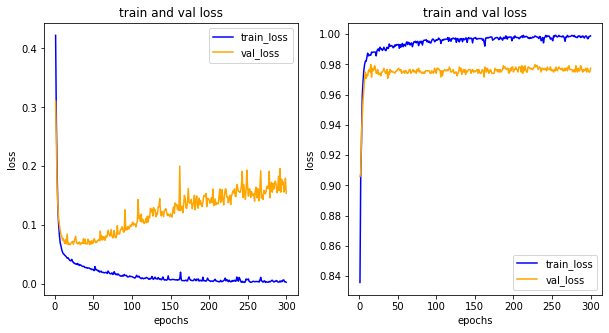

In [43]:
import matplotlib.pyplot as plt
his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) +1)
fig = plt.figure(figsize = (10,5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color= 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_loss')
ax2.plot(epochs, val_acc, color= 'orange', label = 'val_loss')
ax2.set_title('train and val loss')
ax2.set_xlabel('epochs')
ax2.set_ylabel('loss')
ax2.legend()


In [44]:
model.evaluate(x_test, y_test)

32/32 [==============================] - 0s 3ms/step - loss: 0.1588 - acc: 0.9780


[0.15884582698345184, 0.9779999852180481]

In [45]:
y_hat = model.predict(x_test)

In [46]:
y_hat[0]

array([1.3791664e-16], dtype=float32)

In [47]:
threshold = 0.5

result = []
for i in y_hat:
  if i >= threshold:
    result.append(1)
  else:
    result.append(0)

In [49]:
# 리포트를 통한 혼돈매트릭스 확인 
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, result))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       893
           1       0.89      0.91      0.90       107

    accuracy                           0.98      1000
   macro avg       0.94      0.95      0.94      1000
weighted avg       0.98      0.98      0.98      1000

